In [27]:
import pandas as pd
import numpy as np
from re import search
import matplotlib.pyplot as plt
import seaborn as sp
import sklearn
from sklearn import metrics

In [28]:
with open(r'C:\users\niels\Downloads\dialog_acts.dat', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: [x[0:x.index(" ")], x[x.index(" ")+1:-1]], data))
df = pd.DataFrame(np.array(data), columns = ['label', 'text'])
df = df[df.label != 'null']
df = df.reset_index()

In [29]:
def plot_histogram(df):
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.rcParams['font.size'] = 6
    sp.histplot(df['label'])



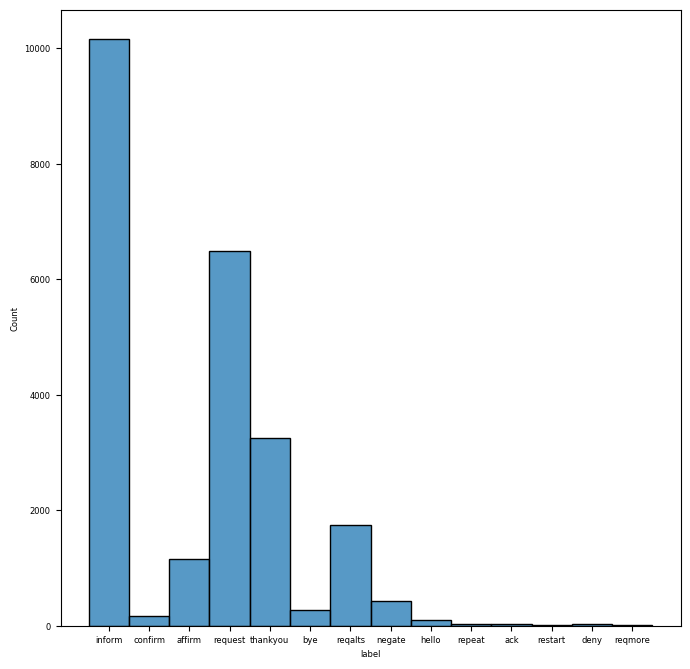

In [30]:
plot_histogram(df)

In [31]:
def df_keyword_matching2(dataframe):
    """
    Rule-based prediction of dialog acts based on utterances.
    Arguments:
        dataframe: a pandas dataframe that contains a column named text with utterances.
        
    Returns:
        Returns a list of predictions about the label (dialog act) of the utterances.
    """
    predictions = []
    for i in range(0,len(dataframe)):
        predictions.append('inform')
    return predictions

In [32]:

def df_keyword_matching(dataframe):
    """
    Rule-based prediction of dialog acts based on utterances.
    Arguments:
        dataframe: a pandas dataframe that contains a column named text with utterances.
        
    Returns:
        Returns a list of predictions about the label (dialog act) of the utterances.
    """
    predictions = []
    for i in range(0,len(dataframe)):
        if search(r'\bhow about\b|\bwhat about\b|\banything else\b|\bare there\b|\bis there\b|\bwhat else\b', df.loc[i,'text']):
            predictions.append('reqalts')
        elif search(r'\byes\b|\byeah\b|\bcorrect\b',df.loc[i,'text']):
            predictions.append('affirm')
        elif search(r'\bthank you\b', df.loc[i,'text']):
            predictions.append('thankyou')
        elif search(r'\bgoodbye\b|\bbye\b', df.loc[i,'text']):
            predictions.append('bye')
        elif search(r'\bdoes it\b|\bis it\b|\bdo they\b|\bis that\b|\bis there\b', df.loc[i,'text']):
            predictions.append('confirm')
        elif search(r'\bwhat is\b|\bwhats\b|\bmay i\b|\bcould i\b|\bwhat\b|\bprice range\b|\bpost code\b|\btype of\b|\baddress\b|\bphone number\b|\bcan i\b|\bcould i\b|\bcould you\b|\bdo you\b|\bi want+.address\b|\bi want+.phone\b|\bi would\b|\bwhere is\b', df.loc[i,'text']):
            predictions.append('request')
        elif search(r'\bno\b|\bnot\b', df.loc[i,'text']):
            predictions.append('negate')
        elif search(r'\blooking for\b|\bdont care\b|\bdoesnt matter\b|\bexpensive\b|\bcheap\b|\bmoderate\b|\bi need\b|\bi want\b|\bfood\b|\bnorth\b',df.loc[i,'text']):
            predictions.append('inform')
        elif search(r'\bdont\b', df.loc[i,'text']):
            predictions.append('deny')
        elif search(r'\bhello\b', df.loc[i,'text']):
            predictions.append('hello')
        elif search(r'\brepeat\b', df.loc[i,'text']):
            predictions.append('repeat')
        elif search(r'\bmore\b', df.loc[i,'text']):
            predictions.append('reqmore')
        elif search(r'\bstart\b', df.loc[i,'text']):
            predictions.append('restart')
        elif search(r'\bokay\b|\bkay\b',df.loc[i,'text']):
            predictions.append('ack')
        else:
            predictions.append('inform')
    return predictions

In [9]:
def new_sentence(utterance):
    """
    Rule-based prediction of a dialog act based on a phrase.
    Arguments:
        utterance: string
        
    Returns:
        Returns the predicted dialog act.
    """
    utterance = utterance.lower()
    if search(r'\bhow about\b|\bwhat about\b|\banything else\b|\bare there\b|\bis there\b|\bwhat else\b', utterance):
        return 'reqalts'
    elif search(r'\byes\b|\byeah\b|\bcorrect\b',utterance):
        return 'affirm'
    elif search(r'\bthank you\b', utterance):
        return 'thankyou'
    elif search(r'\bgoodbye\b|\bbye\b', utterance):
        return 'bye'
    elif search(r'\bdoes it\b|\bis it\b|\bdo they\b|\bis that\b|\bis there\b', utterance):
        return 'confirm'
    elif search(r'\bwhat is\b|\bwhats\b|\bmay i\b|\bcould i\b|\bwhat\b|\bprice range\b|\bpost code\b|\btype of\b|\baddress\b|\bphone number\b|\bcan i\b|\bcould i\b|\bcould you\b|\bdo you\b|\bi want+.address\b|\bi want+.phone\b|\bi would\b|\bwhere is\b', utterance):
        return 'request'
    elif search(r'\bno\b|\bnot\b', utterance):
        return 'negate'
    elif search(r'\blooking for\b|\bdont care\b|\bdoesnt matter\b|\bexpensive\b|\bcheap\b|\bmoderate\b|\bi need\b|\bi want\b|\bfood\b|\bnorth\b',utterance):
        return 'inform'
    elif search(r'\bdont\b', utterance):
        return 'deny'
    elif search(r'\bhello\b|\bhi\b|\bhey\b', utterance):
        return 'hello'
    elif search(r'\brepeat\b', utterance):
        return 'repeat'
    elif search(r'\bmore\b', utterance):
        return 'reqmore'
    elif search(r'\bstart\b', utterance):
        return 'restart'
    elif search(r'\bokay\b|\bkay\b',utterance):
        return 'ack'
    else:
        return 'inform'
    

In [33]:
#test cases (FIRST CASE)
print(new_sentence("Thank you good bye")) #Actual label: thankyou
print(new_sentence("yes good bye")) #Actual label: affirm
print(new_sentence("yes thank you for the recommendation good bye")) #Actual label: affirm
print(new_sentence("uh no thats it good bye")) #Actual label: negate
print(new_sentence("uh no thank you and good bye")) ##Actual label: negate

#test cases (SECOND CASE)

print(new_sentence("what is there in the north")) #Actual label: inform
print(new_sentence("what is there anything else")) #Actual label: reqalts
print(new_sentence("what is the other restaurant with portuguese food")) #Actual label: reqalts
print(new_sentence("kay what is the addres")) #Actual label: inform
print(new_sentence("i dont care about the price range what is the address")) #Actual label: inform

thankyou
affirm
affirm
bye
thankyou
reqalts
reqalts
request
request
request


In [39]:
    def plot_confusion_matrix(labels,predictions):
        """Plots the confusion matrix
        Arguments:
        labels: array-like of shape (n_samples,)
        predictions: array-like of shape (n_samples,)
        Returns
        -------
        plot
            plots the confusion matrix
        """
        plt.rcParams.update(plt.rcParamsDefault)

        plt.rcParams['figure.figsize'] = [12, 12]
        plt.rcParams['font.size'] = 8
        sklearn.metrics.ConfusionMatrixDisplay.from_predictions(labels,predictions)

        plt.show()

In [40]:
predictions = (df_keyword_matching(df))

In [41]:
def baselineAccuracy(predictions, df):
    """Calculates the accuracy
        Arguments:
        predictions: list
        df: a pandas dataframe that contains a column named text with utterances.
        Returns
        -------
    Returns:
        Returns the accuracy
    """
    count = 0
    for i in range(0,len(predictions)):
        
        if(predictions[i].lower() == df.loc[i,'label'].lower()):
            count += 1
    return "Accuracy: "+str(round(count / len(predictions)*100,1))+"%"
        

In [42]:
baselineAccuracy(predictions, df)

'Accuracy: 93.4%'

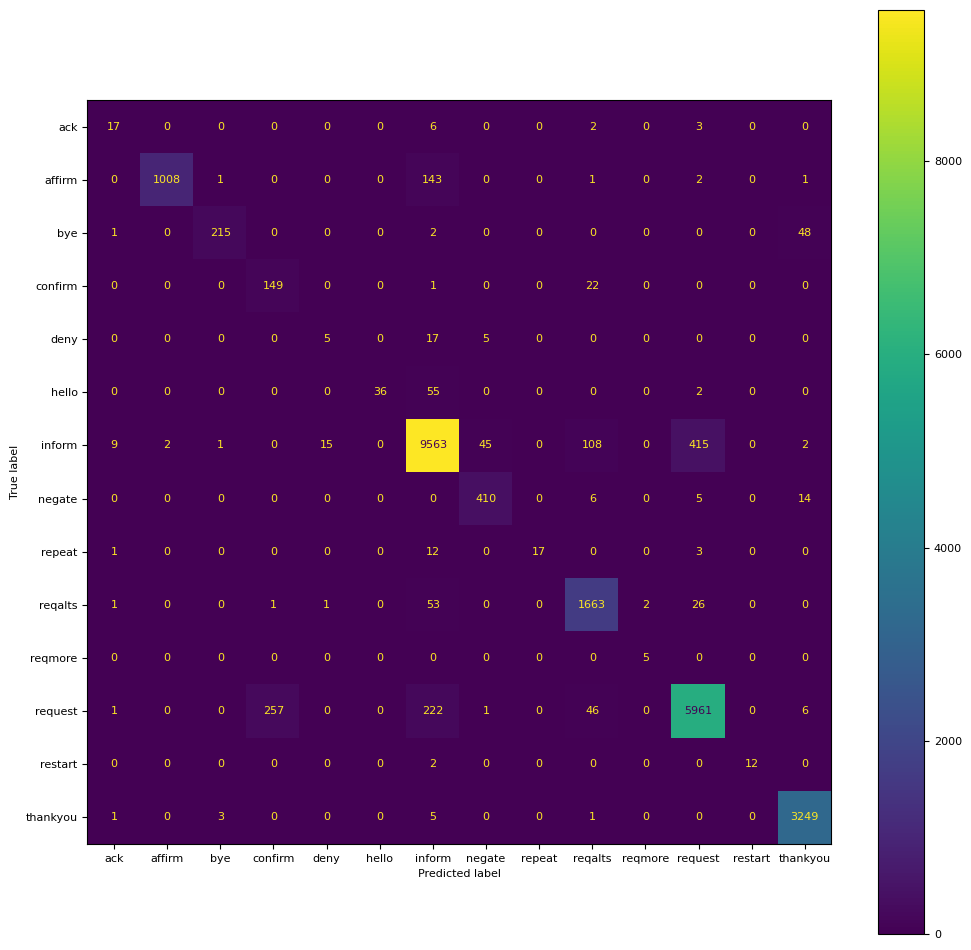

In [43]:
plot_confusion_matrix(df['label'],predictions)

In [20]:
 def F1_score(labels, predictions):
        """Prints metrics
        Arguments:
        labels: array-like of shape (n_samples,)
        predictions: array-like of shape (n_samples,)
        
        Prints different metrics related to the confusion matrix.
        """
        edges_confusion_matrix = sklearn.metrics.confusion_matrix(labels,predictions)

        FP = edges_confusion_matrix.sum(axis=0) - np.diag(edges_confusion_matrix)  
        
        FN = edges_confusion_matrix.sum(axis=1) - np.diag(edges_confusion_matrix)
        
        TP = np.diag(edges_confusion_matrix)
        
        TN = edges_confusion_matrix.sum() - (FP + FN + TP)
        
        
        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)

        # Specificity or true negative rate
        TNR = TN/(TN+FP)

        # Precision or positive predictive value
        PPV = TP/(TP+FP)



        F1 = 2*((PPV*TPR)/(PPV+TPR))
        F1 = F1[~np.isnan(F1)]
        print('F1',F1)
        print('Average F1',np.average(F1))

In [21]:
F1_score(df['label'],predictions)

F1 [0.59678698]
Average F1 0.5967869834650062


C:\Users\niels\odse\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


In [26]:
sklearn.metrics.f1_score(df['label'],predictions,average='macro')

0.04262764167607187